In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [15]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
df = pd.read_csv('data/master.csv')

In [4]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

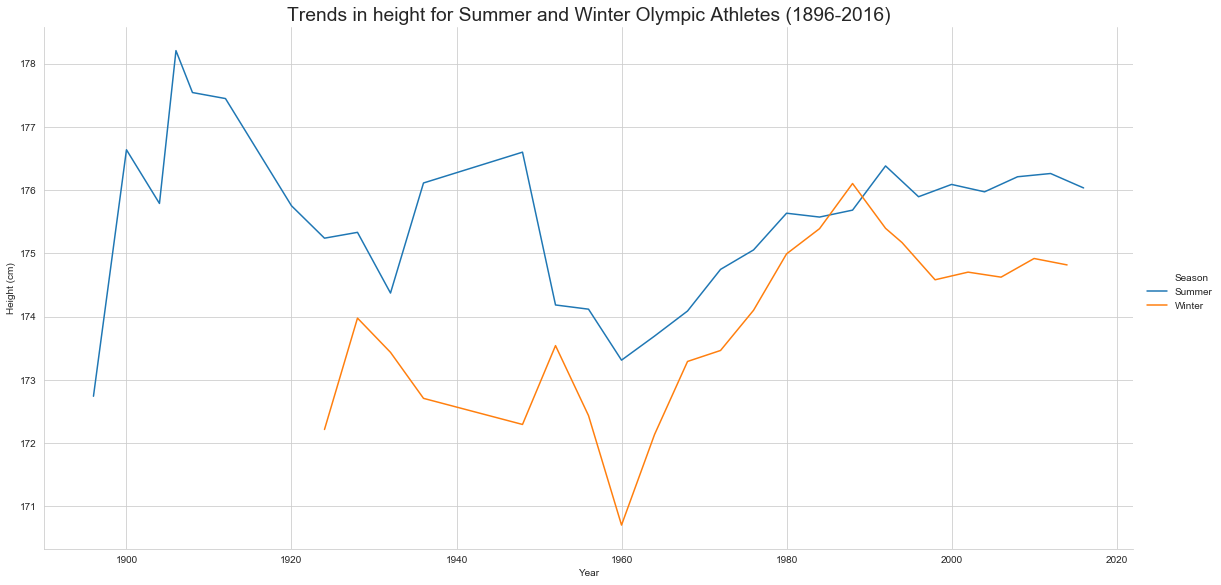

In [5]:
# Height distribution for Olympic Athletes: A seasonal perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Height", kind="line", ci=None, hue='Season', data=df, height = 8, aspect = 2)

plt.rcParams.update({'font.size': 16})
plt.title('Trends in height for Summer and Winter Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height_season_line.png')
# plt.close(g.fig)

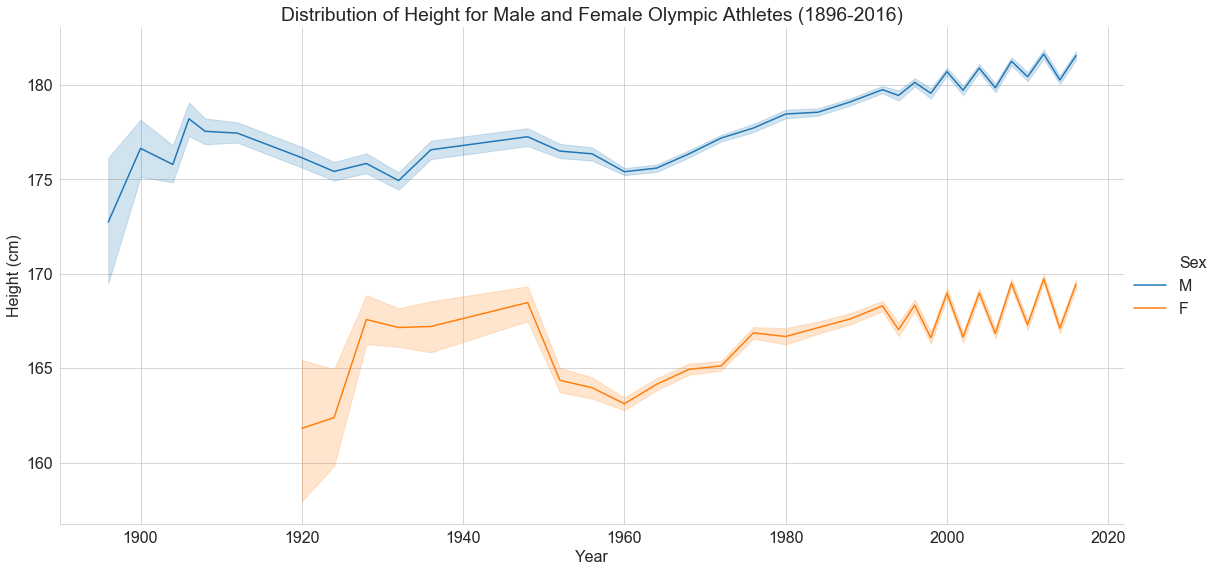

In [6]:
# Height distribution for Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Height", kind="line", hue='Sex', data=df, height = 8, aspect=2)
# g._legend.texts[0].set_text("Gender")
# g._legend.texts[1].set_text("Male")
# g._legend.texts[2].set_text("Female")

plt.title('Distribution of Height for Male and Female Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height_gender_line.png')
plt.show(g)

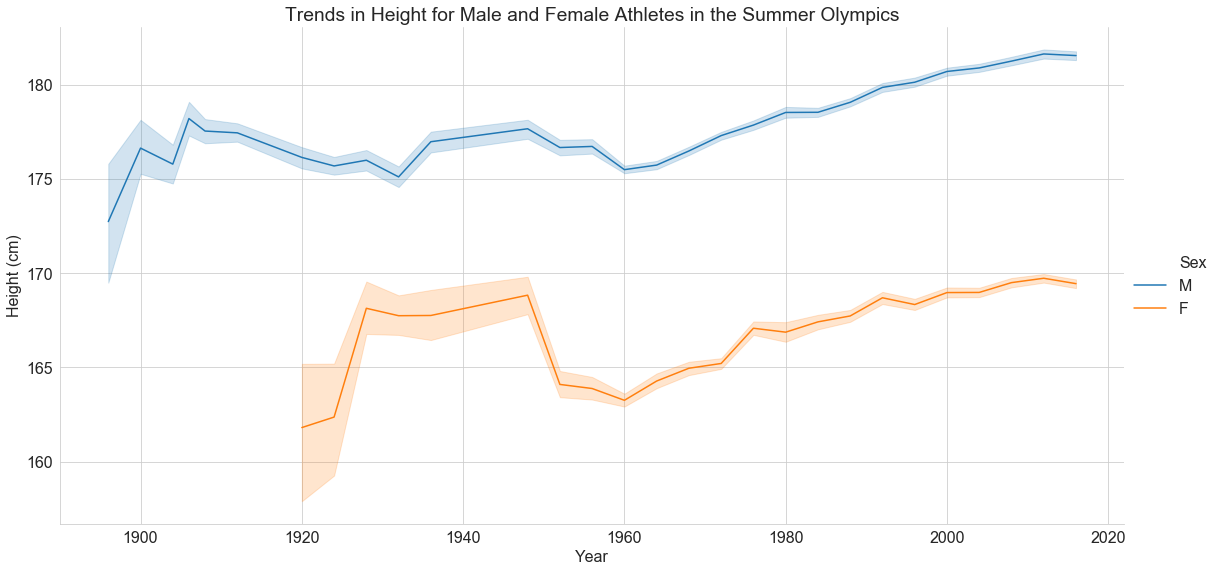

In [7]:
# Trends in Height for Summer Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=summer_df, height = 8, aspect=2)

plt.title('Trends in Height for Male and Female Athletes in the Summer Olympics', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height_summer_gender_line.png')
plt.show(g)

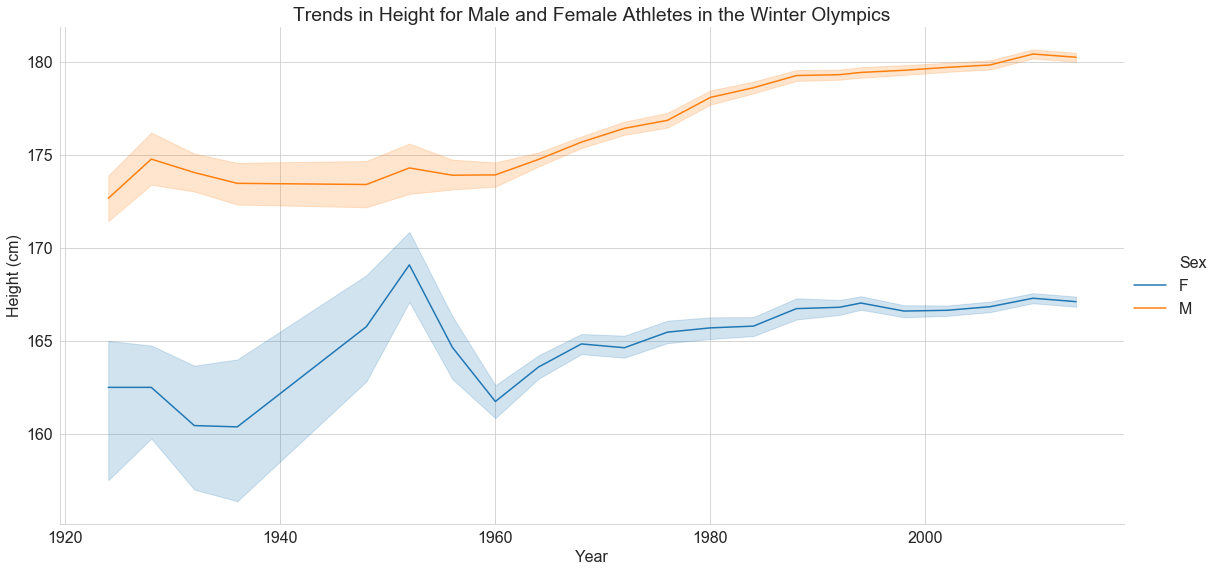

In [8]:
# Trends in Height for Winter Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=winter_df, height = 8, aspect=2)

plt.title('Trends in Height for Male and Female Athletes in the Winter Olympics', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height_winter_gender_line.png')
plt.show(g)

In [11]:
# Shoot yourself in the foot
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [63]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [66]:
# Distribution of Height for all Olympic Athletes (1896-2016)
height_df = df[['Year','Height','Sex','Season']]
chart = alt.Chart(height_df).mark_bar().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q'),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
).properties(title='Distribution of Height for all Olympic Athletes (1896-2016)')

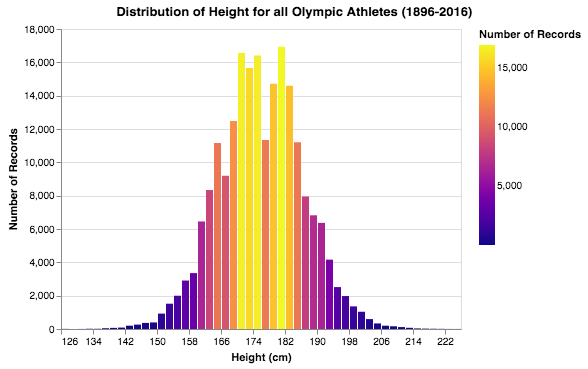

In [67]:
chart

In [68]:
chart.save('plots/height_histogram.png', scale_factor=7.0)

In [58]:
chart = alt.Chart(df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 16000])),
    alt.Color('Sex:N')
)

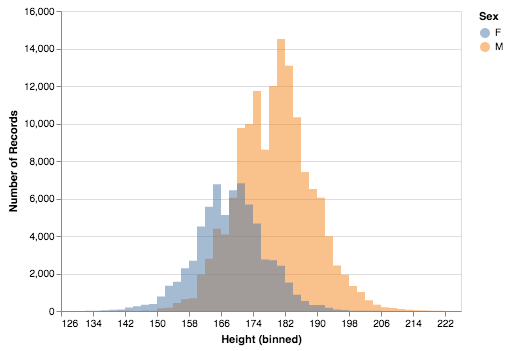

In [32]:
chart

In [33]:
chart.save('plots/height_layer__area.png')

WebDriverException: Message: unknown error: call function result must be a dictionary
  (Session info: headless chrome=72.0.3626.119)
  (Driver info: chromedriver=2.46.628411 (3324f4c8be9ff2f70a05a30ebc72ffb013e1a71e),platform=Mac OS X 10.13.6 x86_64)


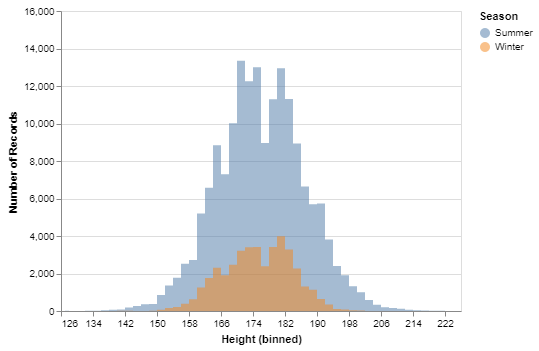

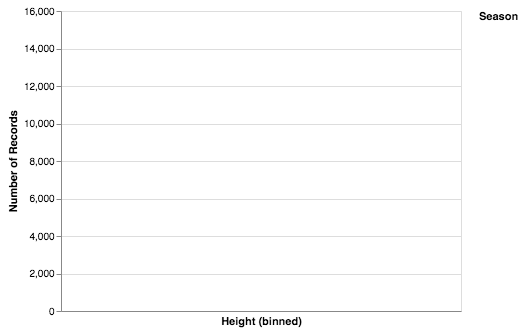

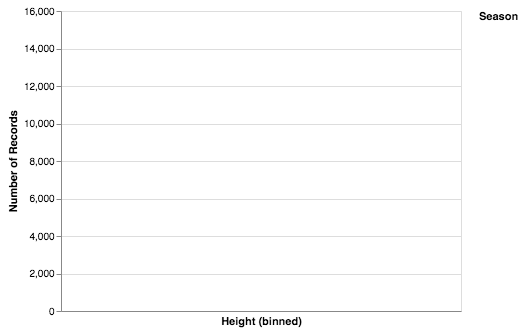

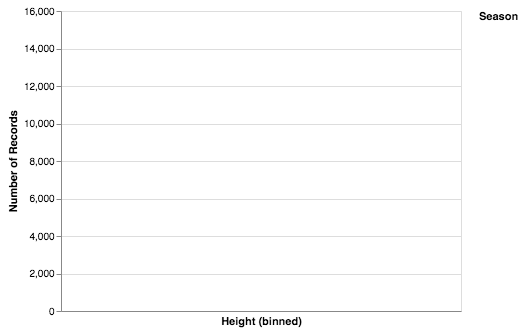

In [11]:
alt.Chart(df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 16000])),
    alt.Color('Season:N')
)

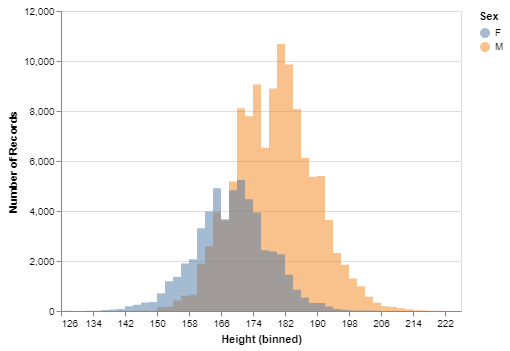

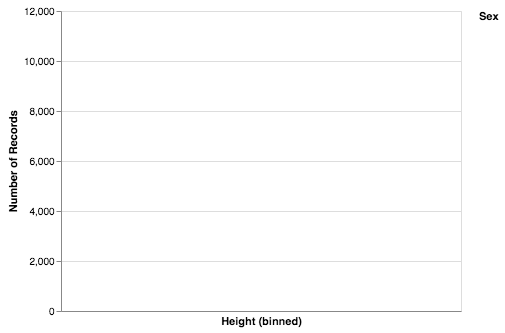

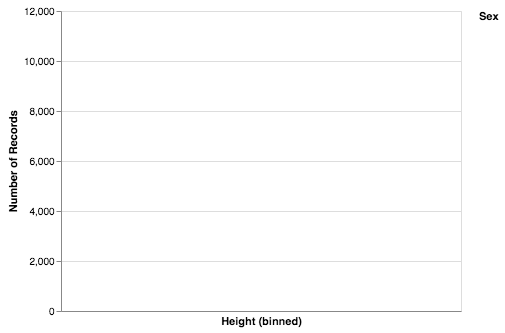

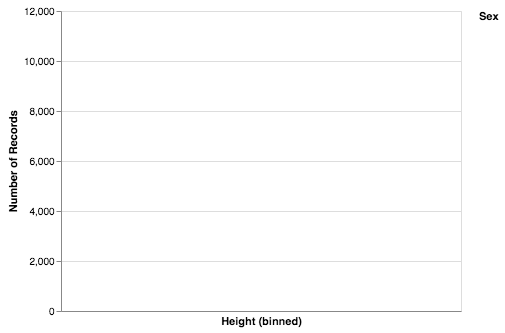

In [12]:
alt.Chart(summer_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 12000])),
    alt.Color('Sex:N')
)

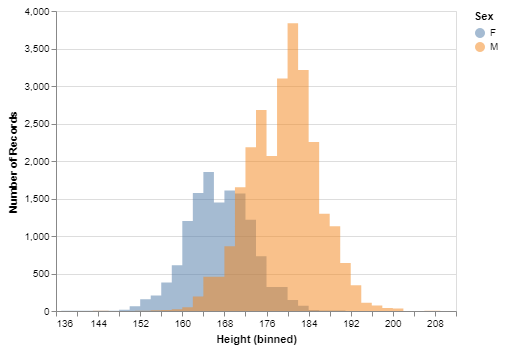

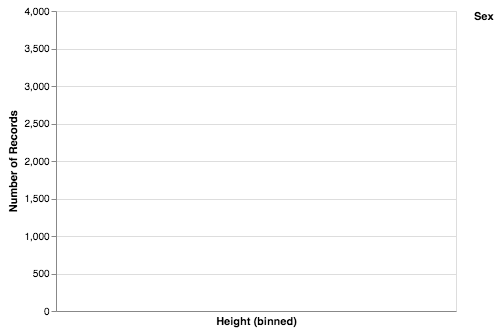

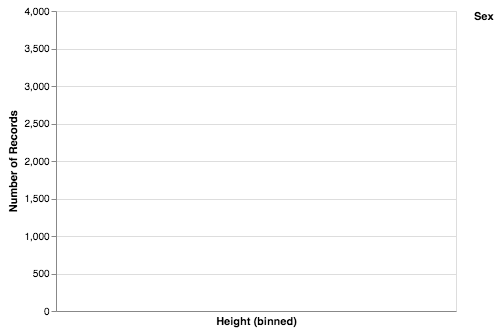

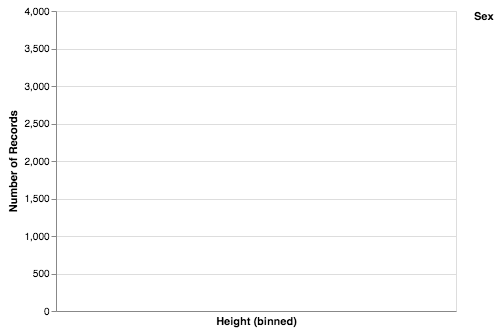

In [13]:
alt.Chart(winter_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 4000])),
    alt.Color('Sex:N')
)

In [ ]:
g = sns.relplot(x="Year", y="Weight", kind="line", hue='Season', data=df)

In [ ]:
g = sns.relplot(x="Year", y="Age", kind="line", hue='Season', data=df)

In [ ]:
alt.Chart(df).mark_rect().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('Weight:Q', bin=alt.Bin(maxbins=60)),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
)

In [ ]:
alt.Chart(summer_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

In [ ]:
alt.Chart(winter_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

In [ ]:
alt.Chart(summer_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

In [ ]:
alt.Chart(winter_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

In [34]:
chart = alt.Chart(summer_df).mark_line().encode(
    x='Year:O',
    y='count(Sex):Q',
)

In [19]:
india_summer_df = summer_df[summer_df['NOC']=='IND']
india_summer_df.shape

(1378, 17)

In [21]:
india_winter_df = winter_df[winter_df['NOC']=='IND']
india_winter_df.shape

(30, 17)

In [37]:
chart = alt.Chart(india_winter_df).mark_point().encode(
    alt.Y('Name'),
    alt.X('Year:O'),
    color='Medal:N'
)

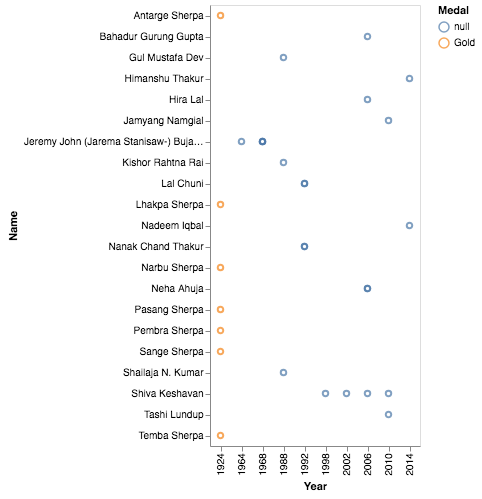

In [38]:
chart

In [ ]:
india_summer_medal = india_summer_df[india_summer_df['Medal'].notnull()]

In [ ]:
alt.Chart(india_summer_medal).mark_point().encode(
    alt.Y('count()'),
    alt.X('Year:O'),
    color='Medal:N'
)

In [ ]:
alt.Chart(india_summer_medal).mark_rect().encode(
    alt.Y('Sport:N'),
    alt.X('Year:O'),
    color='Medal:N'
)

In [ ]:
alt.Chart(india_summer_df).mark_line().encode(
    x='Year:O',
    y='count(Sex):Q',
    color='Sex:N'
)

In [ ]:
summer_medal = summer_df[summer_df['Medal'].notnull()]

In [ ]:
basketball_medal = summer_medal[summer_medal['Sport'] == 'Basketball']

In [ ]:
alt.Chart(basketball_medal).mark_rect().encode(
    alt.Y('region:N'),
    alt.X('Year:O'),
    color=('Medal:N')
)